In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm

In [339]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")
sample = pd.read_csv("dataset/sample.csv")

In [163]:
train_df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [164]:
print("******TRAIN******")
print(train_df.isna().sum())
print()
print("******TEST******")
print(test_df.isna().sum())

******TRAIN******
Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

******TEST******
Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                      

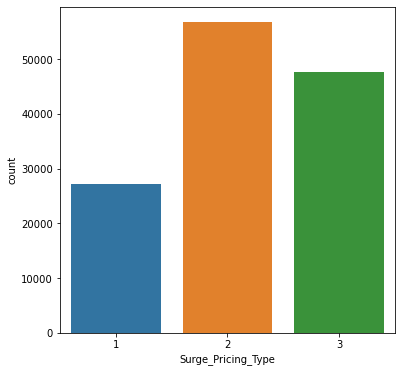

In [165]:
plt.figure(figsize=(6,6))
sns.countplot(train_df['Surge_Pricing_Type'])

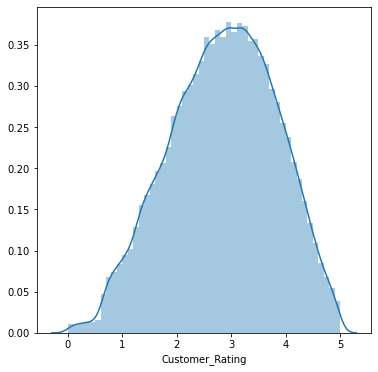

In [166]:
plt.figure(figsize=(6,6))
sns.distplot(train_df['Customer_Rating'])

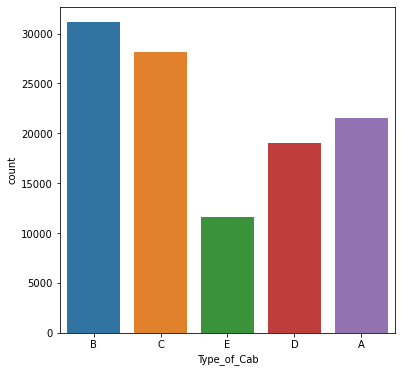

In [167]:
plt.figure(figsize=(6,6))
sns.countplot(train_df['Type_of_Cab'])

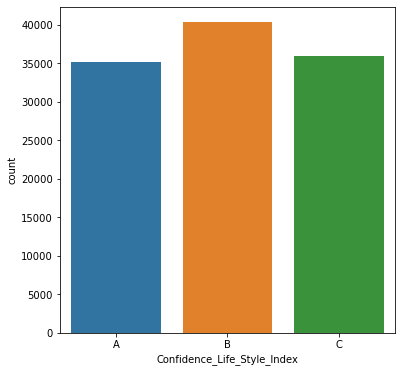

In [168]:
plt.figure(figsize=(6,6))
sns.countplot(train_df['Confidence_Life_Style_Index'])

In [328]:
train_df["Type_of_Cab"].fillna('B',inplace=True)
train_df["Life_Style_Index"].fillna(train_df['Life_Style_Index'].mean(),inplace=True)
train_df["Confidence_Life_Style_Index"].fillna('B',inplace=True)
train_df["Var1"].fillna(float(int(train_df['Var1'].mean())),inplace=True)
train_df["Customer_Since_Months"].fillna(float(int(train_df['Customer_Since_Months'].mean())),inplace=True)

test_df["Type_of_Cab"] = test_df["Type_of_Cab"].fillna("B",inplace=False)
test_df["Life_Style_Index"].fillna(test_df['Life_Style_Index'].mean(),inplace=True)
test_df["Confidence_Life_Style_Index"].fillna("B",inplace=True)
test_df["Var1"].fillna(float(int(test_df['Var1'].mean())),inplace=True)
test_df["Customer_Since_Months"].fillna(float(int(test_df['Customer_Since_Months'].mean())),inplace=True)

In [331]:
train_df = train_df.drop("Trip_ID",axis=1)
test_df = test_df.drop("Trip_ID",axis=1)

In [333]:
train_df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.427690,A,A,3.90500,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.782450,B,A,3.45000,0,38.0,56,78,Male,2
2,41.58,B,10.0,2.802064,B,E,3.50125,2,64.0,56,77,Male,2
3,61.56,C,10.0,2.802064,B,A,3.45375,0,64.0,52,74,Male,3
4,54.95,C,10.0,3.034530,B,A,3.40250,4,51.0,49,102,Male,2


In [294]:
from sklearn.preprocessing import LabelEncoder

In [295]:
le_1 = LabelEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_4 = LabelEncoder()

train_df['Type_of_Cab'] = le_1.fit_transform(train_df['Type_of_Cab'])
train_df['Confidence_Life_Style_Index'] = le_2.fit_transform(train_df['Confidence_Life_Style_Index'])
train_df['Destination_Type'] = le_3.fit_transform(train_df['Destination_Type'])
train_df['Gender'] = le_4.fit_transform(train_df['Gender'])

test_df['Type_of_Cab'] = le_1.transform(test_df['Type_of_Cab'])
test_df['Confidence_Life_Style_Index'] = le_2.transform(test_df['Confidence_Life_Style_Index'])
test_df['Destination_Type'] = le_3.transform(test_df['Destination_Type'])
test_df['Gender'] = le_4.transform(test_df['Gender'])

In [296]:
train_df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1,1.0,2.427690,0,0,3.90500,0,40.0,46,60,0,2
1,29.47,1,10.0,2.782450,1,0,3.45000,0,38.0,56,78,1,2
2,41.58,1,10.0,2.802064,1,4,3.50125,2,64.0,56,77,1,2
3,61.56,2,10.0,2.802064,1,0,3.45375,0,64.0,52,74,1,3
4,54.95,2,10.0,3.034530,1,0,3.40250,4,51.0,49,102,1,2


In [297]:
x = train_df.drop('Surge_Pricing_Type',axis=1)
y = train_df.Surge_Pricing_Type.values

In [298]:
from keras.utils import to_categorical

In [299]:
y = to_categorical(y)

In [300]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [301]:
ohe_cols = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore',categories='auto'),ohe_cols))

In [302]:
x = transformer.fit_transform(x)

In [303]:
x_val = transformer.transform(test_df)

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [373]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Decision Tree :-

In [309]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [344]:
y_pred1 = dt.predict(x_test)
y_pred1 = [np.argmax(i) for i in y_pred1]

y_test1 = [np.argmax(i) for i in y_test]

print(classification_report(y_pred1,y_test1))

              precision    recall  f1-score   support

           1       0.52      0.70      0.60      4023
           2       0.87      0.62      0.73     15842
           3       0.52      0.77      0.62      6468

    accuracy                           0.67     26333
   macro avg       0.64      0.70      0.65     26333
weighted avg       0.73      0.67      0.68     26333



In [343]:
y_pred1 = dt.predict(x_val)
y_pred1 = [np.argmax(i) for i in y_pred1]

sub1 = pd.DataFrame({"Trip_ID":sample.Trip_ID,'Surge_Pricing_Type':y_pred1})
sub1.to_csv('sub1.csv',index=False)

## Random Forest :-

In [342]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [350]:
y_pred2 = rf.predict(x_test)
y_pred2= [np.argmax(i) for i in y_pred2]

y_test2 = [np.argmax(i) for i in y_test]

print(classification_report(y_pred2,y_test2))

              precision    recall  f1-score   support

           1       0.52      0.71      0.60      4012
           2       0.87      0.62      0.73     15833
           3       0.52      0.77      0.62      6488

    accuracy                           0.67     26333
   macro avg       0.64      0.70      0.65     26333
weighted avg       0.73      0.67      0.68     26333



In [348]:
y_pred2 = rf.predict(x_val)
y_pred2 = [np.argmax(i) for i in y_pred2]

sub2 = pd.DataFrame({"Trip_ID":sample.Trip_ID,'Surge_Pricing_Type':y_pred2})
sub2.to_csv('sub2.csv',index=False)

## Gradient Boosting Regressor :-

In [354]:
gbr = GradientBoostingRegressor()
y_train1 = [np.argmax(i) for i in y_train]
gbr.fit(x_train,y_train1)

GradientBoostingRegressor()

In [361]:
y_pred3 = gbr.predict(x_test)
y_pred3= [np.argmax(i) for i in y_pred3]

y_test3 = [np.argmax(i) for i in y_test]

print(classification_report(y_pred3,y_test3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00   26333.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00   26333.0
   macro avg       0.00      0.00      0.00   26333.0
weighted avg       0.00      0.00      0.00   26333.0



## Gaussian Bayes :-

In [367]:
gnb = GaussianNB()
y_train2 = [np.argmax(i) for i in y_train]
gnb.fit(x_train.toarray(),y_train1)

GaussianNB()

In [371]:
y_pred4 = gnb.predict(x_test.toarray())
y_pred4= [np.argmax(i) for i in y_pred4]

y_test4 = [np.argmax(i) for i in y_test]

print(classification_report(y_pred4,y_test4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00   26333.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00   26333.0
   macro avg       0.00      0.00      0.00   26333.0
weighted avg       0.00      0.00      0.00   26333.0



C:\Users\danis\anaconda3\envs\ai42\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danis\anaconda3\envs\ai42\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K Nearest Neighbors :-

In [376]:
kn = KNeighborsClassifier(n_neighbors=25)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [377]:
y_pred5 = gbr.predict(x_test)
y_pred5= [np.argmax(i) for i in y_pred5]

y_test5 = [np.argmax(i) for i in y_test]

print(classification_report(y_pred5,y_test5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00   26333.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00   26333.0
   macro avg       0.00      0.00      0.00   26333.0
weighted avg       0.00      0.00      0.00   26333.0



C:\Users\danis\anaconda3\envs\ai42\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danis\anaconda3\envs\ai42\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Deep Learning :-

In [401]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping

In [410]:
model = Sequential()
model.add(Dense(1024,input_shape=(x_train.shape[1],),activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              25600     
_________________________________________________________________
batch_normalization_15 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dense_32 (Dense)             (None, 32)               

In [411]:
callback = [PlotLossesKeras(),
           EarlyStopping(patience=5,
                        monitor='val_accuracy')]

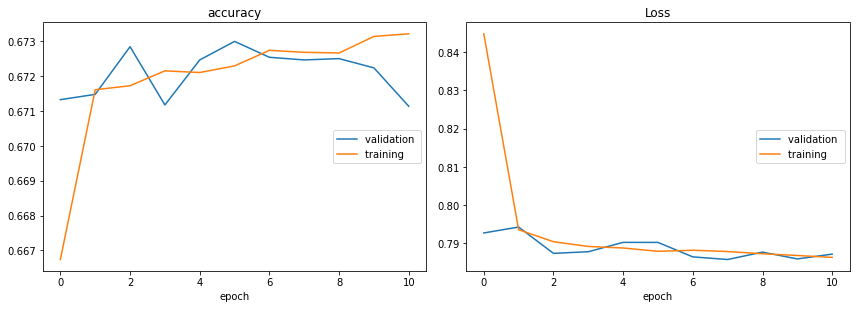

accuracy
	validation       	 (min:    0.671, max:    0.673, cur:    0.671)
	training         	 (min:    0.667, max:    0.673, cur:    0.673)
Loss
	validation       	 (min:    0.786, max:    0.794, cur:    0.787)
	training         	 (min:    0.786, max:    0.845, cur:    0.786)


In [412]:
h = model.fit(x_train,y_train,
             validation_data=(x_test,y_test),
             epochs=35,
             batch_size=128,
             callbacks=callback)

In [413]:
y_pred6 = model.predict(x_val)
y_pred6 = [np.argmax(i) for i in y_pred6]

In [414]:
sub4 = pd.DataFrame({"Trip_ID":sample.Trip_ID,'Surge_Pricing_Type':y_pred6})
sub4.to_csv("sub4.csv",index=False)